In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('CreditData (1).csv')

data

In [3]:
data


,Status,Duration,history,Purpose,amount,Savings,employment,Installment,sex,guarantors,...,Property,Age,OtherInstallment,Housing,ExistingCredits,Job,liable,Telephone,foreign,Approved
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,Yes
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,No
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,Yes
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,Yes
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,Yes
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,Yes
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,Yes
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,No


### STATUS CHECKING

In [4]:
checking_account_status = data['Status']

# Apply label encoding
label_encoder = LabelEncoder()
status_mapping = {
    'A14': 0,
    'A11': 1,
    'A12': 2,
    'A13': 3
}

data['Status'] = data['Status'].map(status_mapping)

## HISTORY CHECKING 

In [5]:
credit_history = data['history']
new_credit_history = label_encoder.fit_transform(credit_history)
data['history'] = new_credit_history

In [6]:
data

,Status,Duration,history,Purpose,amount,Savings,employment,Installment,sex,guarantors,...,Property,Age,OtherInstallment,Housing,ExistingCredits,Job,liable,Telephone,foreign,Approved
0,1,6,4,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,Yes
1,2,48,2,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,No
2,0,12,4,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,Yes
3,1,42,2,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,Yes
4,1,24,3,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,2,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,Yes
996,1,30,2,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,Yes
997,0,12,2,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,Yes
998,1,45,2,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,No


### PURPOSE 

In [7]:
purpose = data['Purpose']
new_purpose = pd.get_dummies(purpose, prefix='purpose')
credit_history_encoded = pd.get_dummies(credit_history, prefix='credit_history')

# Replace the original column with the encoded values
data = pd.concat([data, new_purpose], axis=1)
data.drop('Purpose', axis=1, inplace=True)

### SAVINGS

In [8]:
savings = data['Savings']
savings_mapping = {
    'A65': 0,
    'A61': 1,
    'A62': 2,
    'A63': 3,
    'A64': 4
}
data['Savings'] = data['Savings'].map(savings_mapping)

In [9]:
data

,Status,Duration,history,amount,Savings,employment,Installment,sex,guarantors,residence,...,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49
0,1,6,4,1169,0,A75,4,A93,A101,4,...,0,0,0,0,1,0,0,0,0,0
1,2,48,2,5951,1,A73,2,A92,A101,2,...,0,0,0,0,1,0,0,0,0,0
2,0,12,4,2096,1,A74,2,A93,A101,3,...,0,0,0,0,0,0,0,1,0,0
3,1,42,2,7882,1,A74,2,A93,A103,4,...,0,0,0,1,0,0,0,0,0,0
4,1,24,3,4870,1,A73,3,A93,A101,4,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,2,1736,1,A74,3,A92,A101,4,...,0,0,0,1,0,0,0,0,0,0
996,1,30,2,3857,1,A73,4,A91,A101,4,...,0,1,0,0,0,0,0,0,0,0
997,0,12,2,804,1,A75,4,A93,A101,4,...,0,0,0,0,1,0,0,0,0,0
998,1,45,2,1845,1,A73,4,A93,A101,4,...,0,0,0,0,1,0,0,0,0,0


### EMPLOYMENT 


In [10]:
employment = data['employment']
employment_mapping ={
    'A71': 0,
    'A72': 1,
    'A73': 2,
    'A74': 3,
    'A75': 4,
}

data['employment'] = data ['employment'].map(employment_mapping)


### SEX

In [11]:
personal_status_sex = data['sex']

# Perform one-hot encoding
personal_status_sex_encoded = pd.get_dummies(personal_status_sex, prefix='personal_status_sex')

# Replace the original column with the encoded values
data = pd.concat([data, personal_status_sex_encoded], axis=1)
data.drop('sex', axis=1, inplace=True)

In [12]:
data

,Status,Duration,history,amount,Savings,employment,Installment,guarantors,residence,Property,...,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,personal_status_sex_A91,personal_status_sex_A92,personal_status_sex_A93,personal_status_sex_A94
0,1,6,4,1169,0,4,4,A101,4,A121,...,1,0,0,0,0,0,0,0,1,0
1,2,48,2,5951,1,2,2,A101,2,A121,...,1,0,0,0,0,0,0,1,0,0
2,0,12,4,2096,1,3,2,A101,3,A121,...,0,0,0,1,0,0,0,0,1,0
3,1,42,2,7882,1,3,2,A103,4,A122,...,0,0,0,0,0,0,0,0,1,0
4,1,24,3,4870,1,2,3,A101,4,A124,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,2,1736,1,3,3,A101,4,A121,...,0,0,0,0,0,0,0,1,0,0
996,1,30,2,3857,1,2,4,A101,4,A122,...,0,0,0,0,0,0,1,0,0,0
997,0,12,2,804,1,4,4,A101,4,A123,...,1,0,0,0,0,0,0,0,1,0
998,1,45,2,1845,1,2,4,A101,4,A124,...,1,0,0,0,0,0,0,0,1,0


### GUARANTORS

In [13]:
debtors_guarantors = data['guarantors']

# Perform one-hot encoding
debtors_guarantors_encoded = pd.get_dummies(debtors_guarantors, prefix='debtors_guarantors')

# Replace the original column with the encoded values
data = pd.concat([data, debtors_guarantors_encoded], axis=1)
data.drop('guarantors', axis=1, inplace=True)

In [14]:
data

,Status,Duration,history,amount,Savings,employment,Installment,residence,Property,Age,...,purpose_A46,purpose_A48,purpose_A49,personal_status_sex_A91,personal_status_sex_A92,personal_status_sex_A93,personal_status_sex_A94,debtors_guarantors_A101,debtors_guarantors_A102,debtors_guarantors_A103
0,1,6,4,1169,0,4,4,4,A121,67,...,0,0,0,0,0,1,0,1,0,0
1,2,48,2,5951,1,2,2,2,A121,22,...,0,0,0,0,1,0,0,1,0,0
2,0,12,4,2096,1,3,2,3,A121,49,...,1,0,0,0,0,1,0,1,0,0
3,1,42,2,7882,1,3,2,4,A122,45,...,0,0,0,0,0,1,0,0,0,1
4,1,24,3,4870,1,2,3,4,A124,53,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,2,1736,1,3,3,4,A121,31,...,0,0,0,0,1,0,0,1,0,0
996,1,30,2,3857,1,2,4,4,A122,40,...,0,0,0,1,0,0,0,1,0,0
997,0,12,2,804,1,4,4,4,A123,38,...,0,0,0,0,0,1,0,1,0,0
998,1,45,2,1845,1,2,4,4,A124,23,...,0,0,0,0,0,1,0,1,0,0


### PROPERTY

In [15]:
Property = data['Property']
new_Property = label_encoder.fit_transform(Property)
data['Property'] = new_Property

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Status                   1000 non-null   int64 
 1   Duration                 1000 non-null   int64 
 2   history                  1000 non-null   int32 
 3   amount                   1000 non-null   int64 
 4   Savings                  1000 non-null   int64 
 5   employment               1000 non-null   int64 
 6   Installment              1000 non-null   int64 
 7   residence                1000 non-null   int64 
 8   Property                 1000 non-null   int32 
 9   Age                      1000 non-null   int64 
 10  OtherInstallment         1000 non-null   object
 11  Housing                  1000 non-null   object
 12  ExistingCredits          1000 non-null   int64 
 13  Job                      1000 non-null   object
 14  liable                   1000 non-null   

### INSTALLMENT PLANS

In [17]:
installment_mapping = {
    'A141': 1,
    'A142': 1,
    'A143': 0
}

data['OtherInstallment'] = data['OtherInstallment'].map(installment_mapping)

In [18]:
data

,Status,Duration,history,amount,Savings,employment,Installment,residence,Property,Age,...,purpose_A46,purpose_A48,purpose_A49,personal_status_sex_A91,personal_status_sex_A92,personal_status_sex_A93,personal_status_sex_A94,debtors_guarantors_A101,debtors_guarantors_A102,debtors_guarantors_A103
0,1,6,4,1169,0,4,4,4,0,67,...,0,0,0,0,0,1,0,1,0,0
1,2,48,2,5951,1,2,2,2,0,22,...,0,0,0,0,1,0,0,1,0,0
2,0,12,4,2096,1,3,2,3,0,49,...,1,0,0,0,0,1,0,1,0,0
3,1,42,2,7882,1,3,2,4,1,45,...,0,0,0,0,0,1,0,0,0,1
4,1,24,3,4870,1,2,3,4,3,53,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,2,1736,1,3,3,4,0,31,...,0,0,0,0,1,0,0,1,0,0
996,1,30,2,3857,1,2,4,4,1,40,...,0,0,0,1,0,0,0,1,0,0
997,0,12,2,804,1,4,4,4,2,38,...,0,0,0,0,0,1,0,1,0,0
998,1,45,2,1845,1,2,4,4,3,23,...,0,0,0,0,0,1,0,1,0,0


### HOUSING

In [19]:
housing = data['Housing']

# Perform one-hot encoding
housing_encoded = pd.get_dummies(housing, prefix='housing')

# Replace the original column with the encoded values
data = pd.concat([data, housing_encoded], axis=1)
data.drop('Housing', axis=1, inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Status                   1000 non-null   int64 
 1   Duration                 1000 non-null   int64 
 2   history                  1000 non-null   int32 
 3   amount                   1000 non-null   int64 
 4   Savings                  1000 non-null   int64 
 5   employment               1000 non-null   int64 
 6   Installment              1000 non-null   int64 
 7   residence                1000 non-null   int64 
 8   Property                 1000 non-null   int32 
 9   Age                      1000 non-null   int64 
 10  OtherInstallment         1000 non-null   int64 
 11  ExistingCredits          1000 non-null   int64 
 12  Job                      1000 non-null   object
 13  liable                   1000 non-null   int64 
 14  Telephone                1000 non-null   

### JOB

In [21]:
job_mapping = {
    'A171': 0,
    'A172': 1,
    'A173': 2,
    'A174': 3
}
data['Job'] = data['Job'].map(job_mapping)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Status                   1000 non-null   int64 
 1   Duration                 1000 non-null   int64 
 2   history                  1000 non-null   int32 
 3   amount                   1000 non-null   int64 
 4   Savings                  1000 non-null   int64 
 5   employment               1000 non-null   int64 
 6   Installment              1000 non-null   int64 
 7   residence                1000 non-null   int64 
 8   Property                 1000 non-null   int32 
 9   Age                      1000 non-null   int64 
 10  OtherInstallment         1000 non-null   int64 
 11  ExistingCredits          1000 non-null   int64 
 12  Job                      1000 non-null   int64 
 13  liable                   1000 non-null   int64 
 14  Telephone                1000 non-null   

### TELEPHONE AND FOREIGN

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Telephone'] = label_encoder.fit_transform(data['Telephone'])
data['foreign'] = label_encoder.fit_transform(data['foreign'])


In [24]:
data['Approved'] = label_encoder.fit_transform(data['Approved'])

##  SPLIITING AND APPLYING THE DECISION TREE 

In [25]:
X = data.drop('Approved', axis=1)
y = data['Approved']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.725
Confusion Matrix:
[[ 29  30]
 [ 25 116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.49      0.51        59
           1       0.79      0.82      0.81       141

    accuracy                           0.73       200
   macro avg       0.67      0.66      0.66       200
weighted avg       0.72      0.72      0.72       200



In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming 'y_test' and 'y_pred' are your true labels and predicted labels, respectively

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)

# Calculate class-specific accuracy
class_0_accuracy = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
class_1_accuracy = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])

# Print class-specific accuracies
print(f'Accuracy for Class 0: {class_0_accuracy}')
print(f'Accuracy for Class 1: {class_1_accuracy}')

# Print overall results
print('\nOverall Results:')
print(f'Overall Accuracy: {overall_accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Accuracy for Class 0: 0.4915254237288136
Accuracy for Class 1: 0.8226950354609929

Overall Results:
Overall Accuracy: 0.725
Confusion Matrix:
[[ 29  30]
 [ 25 116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.49      0.51        59
           1       0.79      0.82      0.81       141

    accuracy                           0.73       200
   macro avg       0.67      0.66      0.66       200
weighted avg       0.72      0.72      0.72       200



|--- Status <= 0.50
|   |--- OtherInstallment <= 0.50
|   |   |--- Age <= 30.50
|   |   |   |--- amount <= 6465.50
|   |   |   |   |--- debtors_guarantors_A102 <= 0.50
|   |   |   |   |   |--- purpose_A46 <= 0.50
|   |   |   |   |   |   |--- Installment <= 3.50
|   |   |   |   |   |   |   |--- purpose_A40 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- purpose_A40 >  0.50
|   |   |   |   |   |   |   |   |--- personal_status_sex_A92 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- personal_status_sex_A92 >  0.50
|   |   |   |   |   |   |   |   |   |--- amount <= 2878.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- amount >  2878.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Installment >  3.50
|   |   |   |   |   |   |   |--- Duration <= 11.00
|   |   |   |   |   |   |   |   |--- personal_status_sex_A92 <= 0.50
|  

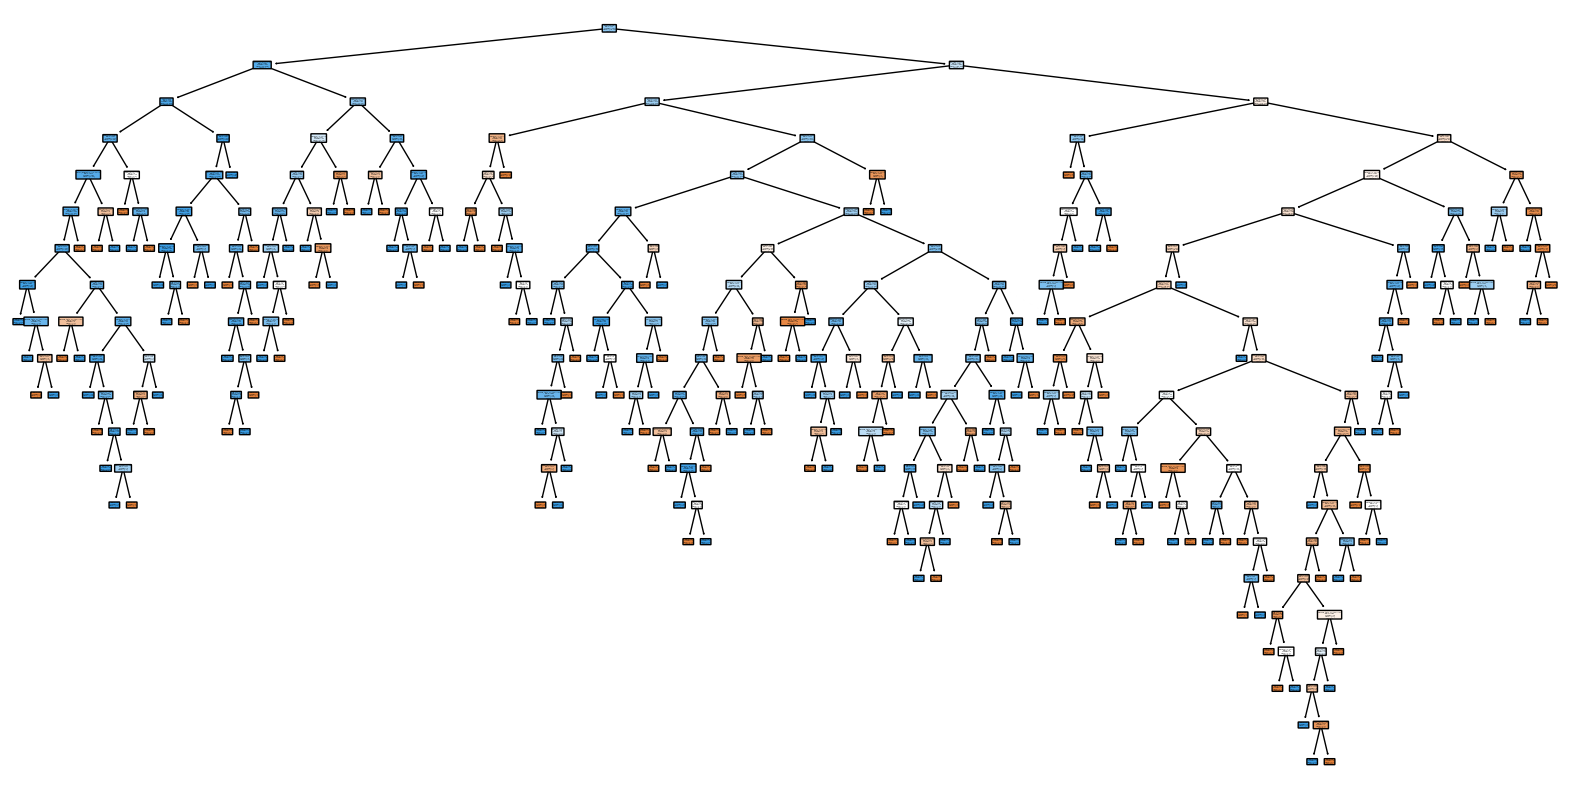

In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text

# Assuming 'data' is your DataFrame
# Assuming 'Approved' is your target variable

# Convert 'Approved' to string type if not already
data['Approved'] = data['Approved'].astype(str)

# Extract features (X) and target variable (y)
X = data.drop('Approved', axis=1)
y = data['Approved']

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Visualize the decision tree using export_text
tree_rules = export_text(clf, feature_names=X.columns.tolist())
print(tree_rules)
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
data['Approved'] = data['Approved'].astype(str)
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.show()

### Graphical Representation 

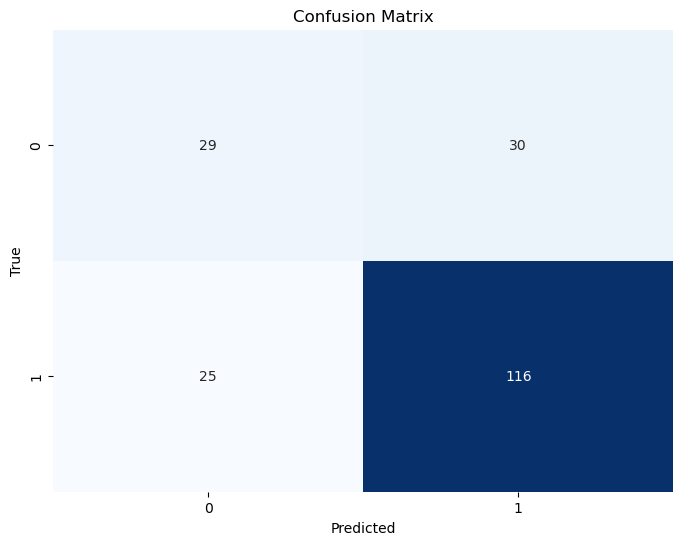

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.preprocessing import label_binarize

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




### APPLYING THE RANDOM FOREST 

Accuracy: 0.78
Confusion Matrix:
[[ 25  34]
 [ 10 131]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.42      0.53        59
           1       0.79      0.93      0.86       141

    accuracy                           0.78       200
   macro avg       0.75      0.68      0.69       200
weighted avg       0.77      0.78      0.76       200



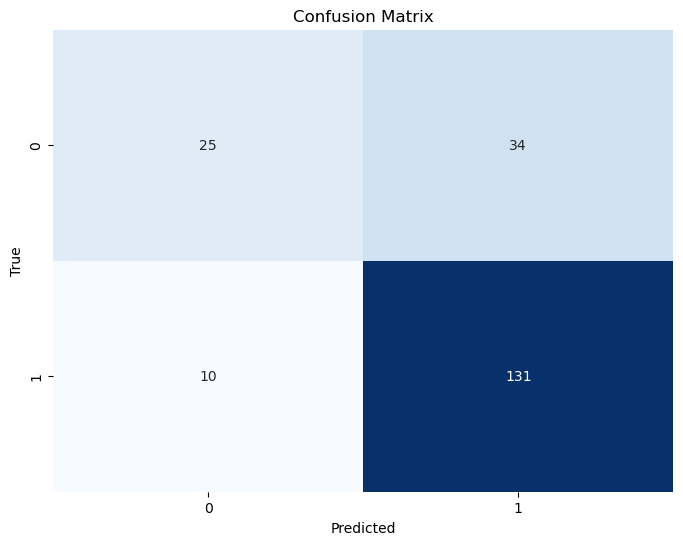

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

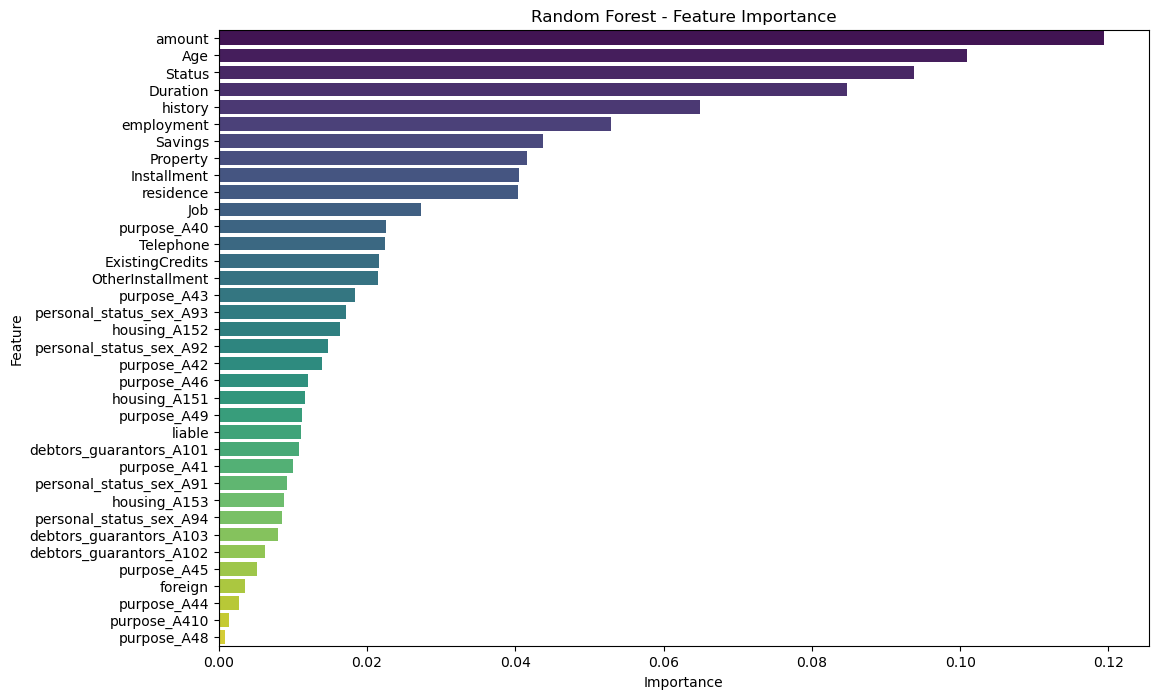

Top 10 most important features:

       Feature  Importance
3       amount    0.119461
9          Age    0.100859
0       Status    0.093729
1     Duration    0.084774
2      history    0.064933
5   employment    0.052925
4      Savings    0.043729
8     Property    0.041506
6  Installment    0.040511
7    residence    0.040405


In [31]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Random Forest - Feature Importance')
plt.show()

# Display the top N most important features
top_n_features = 10
print(f'Top {top_n_features} most important features:\n')
print(feature_importance.head(top_n_features))

XGBoost Accuracy: 0.8
XGBoost Confusion Matrix:
[[ 33  26]
 [ 14 127]]
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.56      0.62        59
           1       0.83      0.90      0.86       141

    accuracy                           0.80       200
   macro avg       0.77      0.73      0.74       200
weighted avg       0.79      0.80      0.79       200



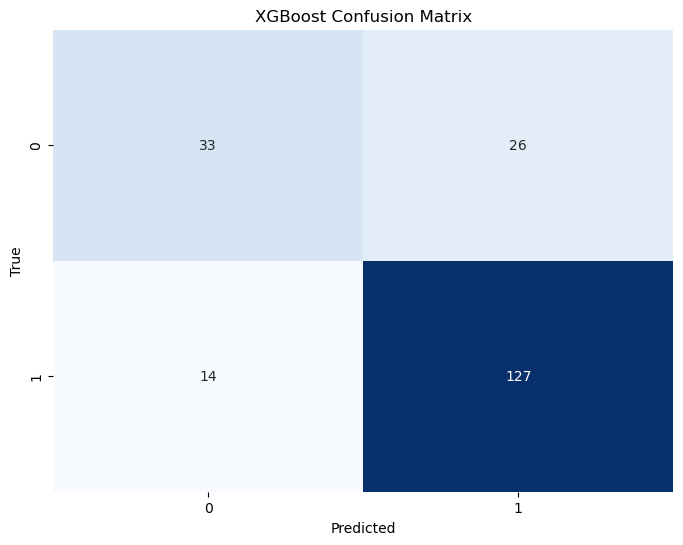

In [37]:

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Create an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Print metrics for XGBoost
print(f'XGBoost Accuracy: {accuracy_xgb}')
print(f'XGBoost Confusion Matrix:\n{conf_matrix_xgb}')
print(f'XGBoost Classification Report:\n{classification_rep_xgb}')

# Plot Confusion Matrix for XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


                                              0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB 1.2 MB/s eta 0:00:00


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

<Figure size 2000x1000 with 0 Axes>

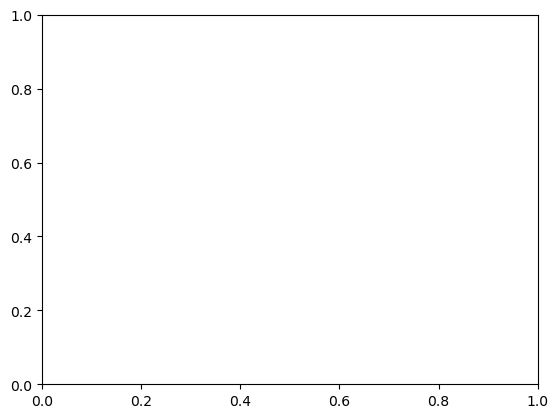

In [35]:
!pip install graphviz
from xgboost import plot_tree
import matplotlib.pyplot as plt

# Assuming you have already trained your XGBoost model (xgb_classifier)
# You can specify the tree index you want to plot, e.g., the first tree (index 0)
tree_index = 0

# Plot the specified tree
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(xgb_classifier, num_trees=tree_index, rankdir='LR')  # 'rankdir' controls the orientation of the tree
plt.show()